# 1.Collect Initial Data

In [2]:
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# 1 Cotización

In [4]:
neg_all = pd.read_excel('..\\..\\Datos\\working\\negocios_all.xlsx')
print(neg_all.shape)
neg_all.head()

(2347, 49)


,ID,Fecha Cotizacion,ID Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Productos,Jefe Comercial,Ejecutivo Comercial,...,Razon Social,Giro,Nacionalidad,N° Grupo Familiar,Actividad,Cargo,Situacion Laboral,Empleador,Antiguedad Laboral,Profesión
0,42212,2017-07-27 15:46:58.750,111502,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TB-104,Est-65",Alejandra Pooley Flores,Graciela Pareja Cancino,...,NaN,NaN,NaN,3,Tecnico,NaN,NaN,NaN,0.0,NaN
1,42242,2017-07-29 13:42:09.993,111611,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,TA-303,Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,NaN,Sin Información,Empleado,NaN,NaN,NaN,0.0,NaN
2,42263,2017-07-31 11:02:25.760,111766,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-06",Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,Sin Información,Empleado,a,Sin Información,a,1.0,Empresario
3,42379,2017-08-11 16:07:40.227,112677,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"Bod-01,TA-301,Est-26",Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,5,Profesional,Matrona,Dependiente,NaN,1.0,Matrona
4,42382,2017-08-11 16:13:46.600,112680,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"Est-17,Est-18",Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,Sin Información,Profesional,Odontologo,Dependiente,Cesfam Lautaro Caceres,5.0,Odontólogo


In [5]:
print(neg_all.columns)

Index(['ID', 'Fecha Cotizacion', 'ID Cotizacion', 'Medio', 'Tipo de Medio',
       'Proyecto', 'Etapa', 'Productos', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'Estado', 'Estado Comercial', 'Fecha Promesa',
       'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion',
       'Motivo Desis/Resc', 'Description Desis/Resc',
       'Resciliacion por Modificacion', 'RUT', 'Nombre', 'Apellido 1',
       'Apellido 2', 'Nombre Completo', 'Telefono', 'Celular', 'Direccion',
       'Region', 'Provincia', 'Comuna', 'Correo Electronico', 'Sexo',
       'Estado Civil', 'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente',
       'Razon Social', 'Giro', 'Nacionalidad', 'N° Grupo Familiar',
       'Actividad', 'Cargo', 'Situacion Laboral', 'Empleador',
       'Antiguedad Laboral', 'Profesión'],
      dtype='object')


In [29]:
g = neg_all.columns.to_series().groupby(neg_all.dtypes).groups
for key in g.keys():
    print('Key: ',key)
    print('Total attributes: ',len(g[key]))

Key:  int64
Total attributes:  2
Key:  datetime64[ns]
Total attributes:  6
Key:  float64
Total attributes:  4
Key:  object
Total attributes:  37


## 1.1 Utils

In [7]:
#Variables categoricas
def ver_atributo_categorico(df,col,limit=False,lim=10,log=False,hue=None,palette=None):
    l = df[col].unique().tolist()
    l_len = len(l)
    
    if log:
        print(l_len,l)
    
    sb.set_color_codes("muted")
    if limit:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:lim],hue=hue,palette=palette);
    else:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:l_len],hue=hue,palette=palette);

## 1.2 Categorical Exploration

### 1.2.1 Medio

Valores nulos:  0


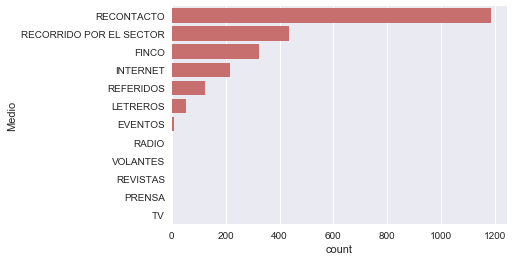

In [9]:
print('Valores nulos: ',neg_all.Medio.isnull().sum())
ver_atributo_categorico(neg_all,'Medio')

### 1.2.2 Tipo Medio

Valores nulos:  0


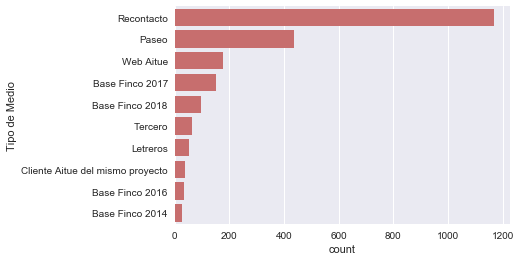

In [12]:
print('Valores nulos: ',neg_all['Tipo de Medio'].isnull().sum())
ver_atributo_categorico(neg_all,'Tipo de Medio',lim=10,limit=True)

### 1.2.3 Proyecto

Valores nulos:  0


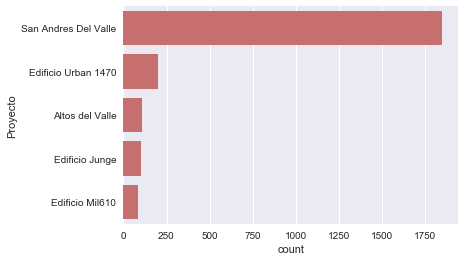

In [11]:
print('Valores nulos: ',neg_all.Proyecto.isnull().sum())
ver_atributo_categorico(neg_all,'Proyecto')

### 1.2.4 Sexo

Valores nulos:  0


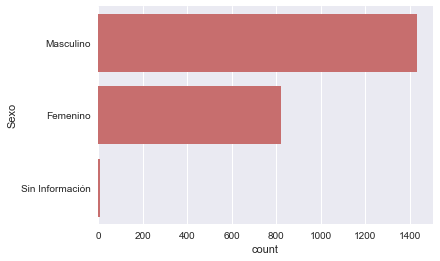

In [30]:
print('Valores nulos: ',neg_all.Proyecto.isnull().sum())
ver_atributo_categorico(neg_all,'Sexo')

### 1.2.5 Region

Valores nulos:  0


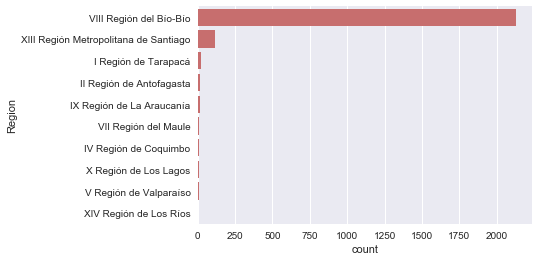

In [34]:
print('Valores nulos: ',neg_all.Region.isnull().sum())
ver_atributo_categorico(neg_all,'Region',lim=10,limit=True)

### 1.2.6 Provincia

Valores nulos:  0


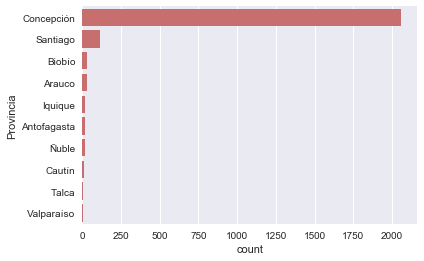

In [36]:
print('Valores nulos: ',neg_all.Provincia.isnull().sum())
ver_atributo_categorico(neg_all,'Provincia',lim=10,limit=True)

### 1.2.7 Comuna

Valores nulos:  0


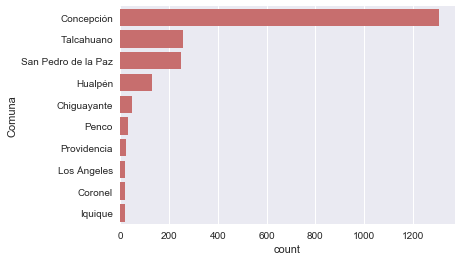

In [39]:
print('Valores nulos: ',neg_all.Comuna.isnull().sum())
ver_atributo_categorico(neg_all,'Comuna',lim=10,limit=True)

### 1.2.7 Estado Civil

Valores nulos:  78


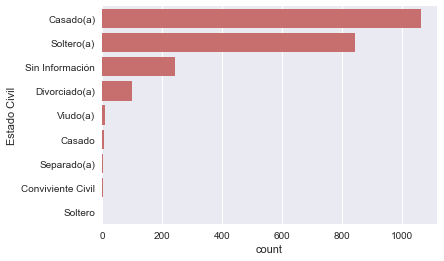

In [40]:
print('Valores nulos: ',neg_all['Estado Civil'].isnull().sum())
ver_atributo_categorico(neg_all,'Estado Civil')

### 1.2.8 Etapa Proyeto

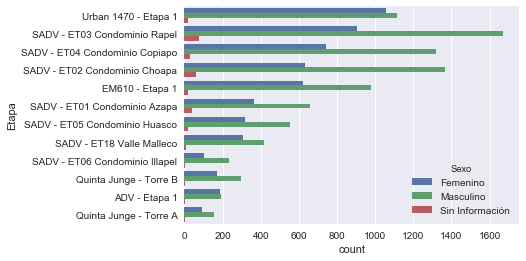

In [28]:
print('Valores nulos: ',neg_all['Estado Civil'].isnull().sum())
palette=["C0","C1","C2"]
ver_atributo_categorico(neg_all,'Etapa',hue='Sexo',palette=palette)

### 1.2.9 Actividad

Valores nulos:  122


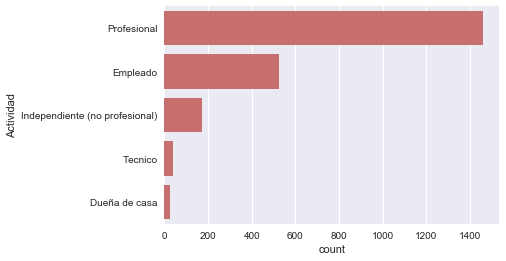

In [45]:
print('Valores nulos: ',neg_all['Actividad'].isnull().sum())
ver_atributo_categorico(neg_all,'Actividad')

### 1.2.10 Nro Grupo Familiar

Valores nulos:  488


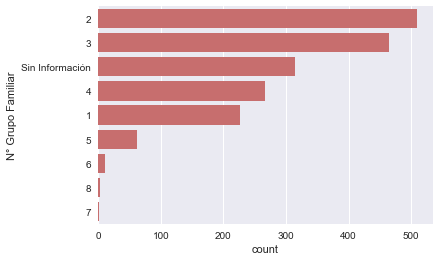

In [44]:
print('Valores nulos: ',neg_all['N° Grupo Familiar'].isnull().sum())
ver_atributo_categorico(neg_all,'N° Grupo Familiar')

### 1.2.11 Cargo

Valores nulos:  1393


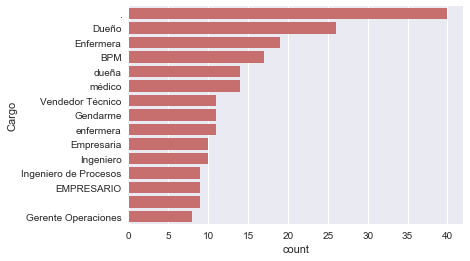

In [48]:
print('Valores nulos: ',neg_all['Cargo'].isnull().sum())
ver_atributo_categorico(neg_all,'Cargo',limit=True,lim=15)

### 1.2.12 Cargo

Valores nulos:  1129


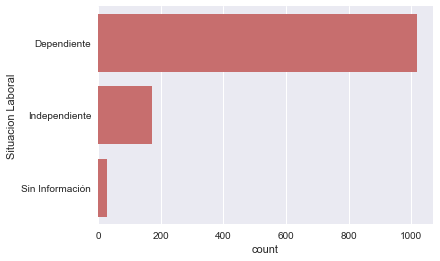

In [52]:
print('Valores nulos: ',neg_all['Situacion Laboral'].isnull().sum())
ver_atributo_categorico(neg_all,'Situacion Laboral')

### 1.2.13 Cargo

Valores nulos:  853


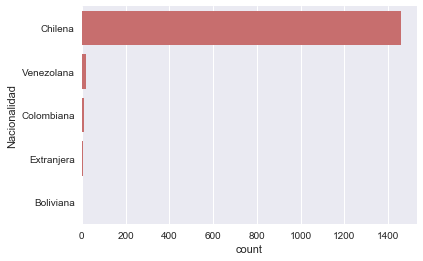

In [54]:
print('Valores nulos: ',neg_all['Nacionalidad'].isnull().sum())
ver_atributo_categorico(neg_all,'Nacionalidad')

### 1.2.13 Nacionalidad

Valores nulos:  22


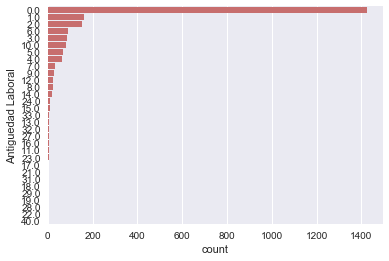

In [55]:
print('Valores nulos: ',neg_all['Antiguedad Laboral'].isnull().sum())
ver_atributo_categorico(neg_all,'Antiguedad Laboral')

### 1.2.13 Empleador

Valores nulos:  1332


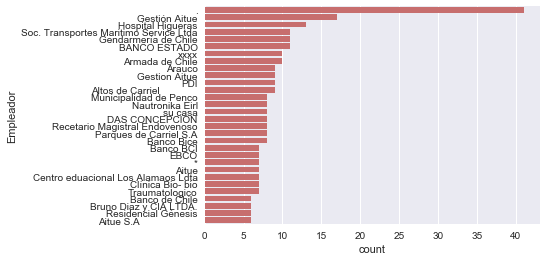

In [57]:
print('Valores nulos: ',neg_all['Empleador'].isnull().sum())
ver_atributo_categorico(neg_all,'Empleador',log=False, limit = True, lim=30)

### 1.2.14 Profesión

Valores nulos:  774
101 [nan, 'Empresario', 'Matrona', 'Odontólogo', 'Profesor', 'Ingeniería en Biotecnología', 'Otro', 'Ingeniero Eléctrico', 'Técnico en Construcción', 'Fonoaudiólogo', 'Diseño Industrial', 'Mecánico Industrial', 'Enfermería', 'Ingeniero Civil Industrial', 'Nutrición y Dietética', 'Educadora de Párvulos', 'Ingeniero Civil Electrónico', 'Ingeniero de Ejecución', 'Ingeniero Comercial', 'Psicólogo', 'Ingeniero en Construcción', 'Ingeniero', 'Periodista', 'Ingeniero Civil Eléctrico', 'Tecnólogo Médico', 'Vendedor', 'Docente', 'Ingeniero Biomédica', 'Contador Auditor', 'Asistente Social', 'Ingeniero Civil en Informática', 'Ingeniero Civil', 'Médico', 'Ingeniero Civil Química', 'Químico Farmaceutico', 'Diseñador de Ambientes', 'Independiente', 'Bioquimico', 'Abogado', 'Ingeniero Forestal', 'Ingeniero Civil Mecánico', 'Empleado Público', 'Constructor Civil', 'Agronomo', 'Ingeniero en Prevención de Riesgo', 'Administrador Público', 'Arquitecto', 'Transportista', 'Ingeniero Me

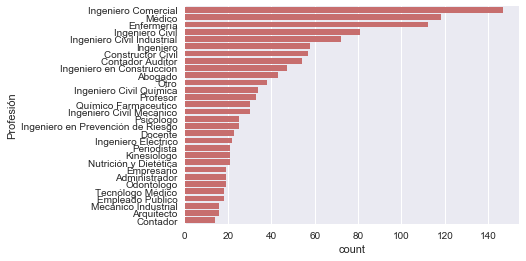

In [58]:
print('Valores nulos: ',neg_all['Profesión'].isnull().sum())
ver_atributo_categorico(neg_all,'Profesión',log=True, limit = True, lim=30)

Valores nulos:  1
3 ['Natural', 'Jurídico', nan]


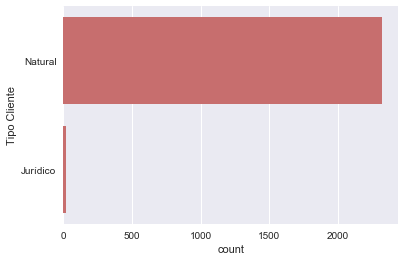

In [60]:
print('Valores nulos: ',neg_all['Tipo Cliente'].isnull().sum())
ver_atributo_categorico(neg_all,'Tipo Cliente',log=True, limit = True, lim=20)

Valores nulos:  0


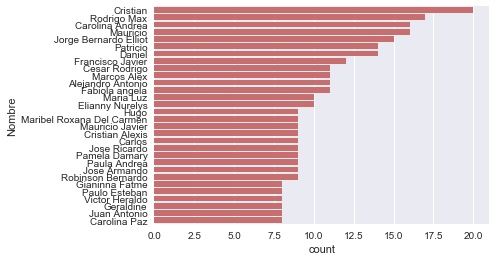

In [74]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Nombre'].isnull().sum())
ver_atributo_categorico(neg_all,'Nombre', limit = True, lim=30)
# f.savefig('..\\img\\neg\\nombre_check.png',bbox_inches='tight')

Valores nulos:  16


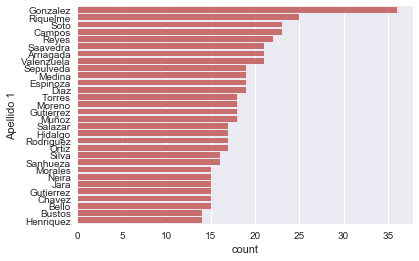

In [75]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Apellido 1'].isnull().sum())
ver_atributo_categorico(neg_all,'Apellido 1', limit = True, lim=30)
# f.savefig('img/neg/apellido1_check.png',bbox_inches='tight')

Valores nulos:  25


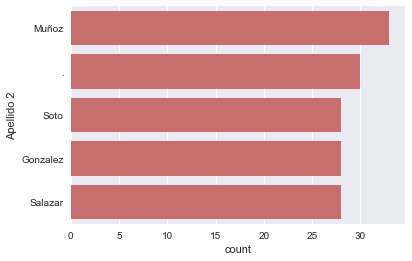

In [76]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Apellido 2'].isnull().sum())
ver_atributo_categorico(neg_all,'Apellido 2',log=False, limit = True, lim=5)
# f.savefig('img/apellido2_check.png',bbox_inches='tight')

Valores nulos:  1961


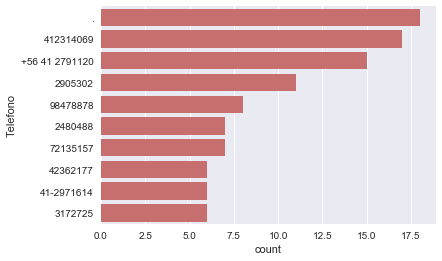

In [78]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Telefono'].isnull().sum())
ver_atributo_categorico(neg_all,'Telefono', limit = True, lim=10)
# f.savefig('img/telefono_check.png',bbox_inches='tight')

Valores nulos:  1


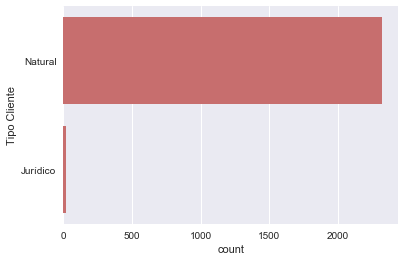

In [79]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Tipo Cliente'].isnull().sum())
ver_atributo_categorico(neg_all,'Tipo Cliente',log=False, limit = True, lim=5)
# f.savefig('img/celular_check.png',bbox_inches='tight')

Valores nulos:  0


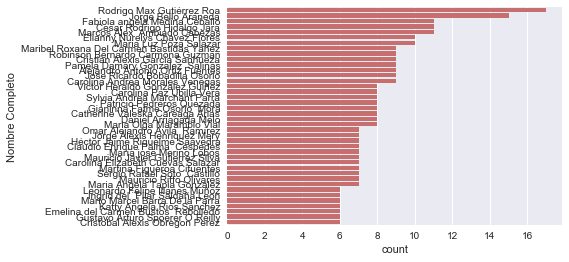

In [80]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Nombre Completo'].isnull().sum())
ver_atributo_categorico(neg_all,'Nombre Completo', limit = True, lim=40)
# f.savefig('img/nombrecompleto_check.png',bbox_inches='tight')

Valores nulos:  78


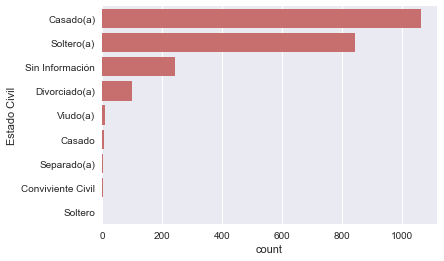

In [81]:
print('Valores nulos: ',neg_all['Estado Civil'].isnull().sum())
ver_atributo_categorico(neg_all,'Estado Civil')

Valores nulos:  0
3 ['Normal', 'Desistimiento', 'Resciliacion']


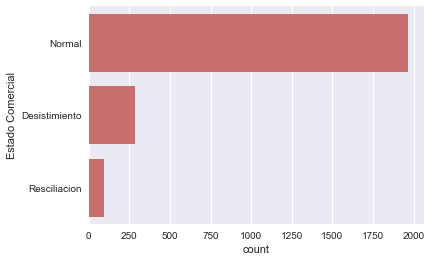

In [83]:
print('Valores nulos: ',neg_all['Estado Comercial'].isnull().sum())
ver_atributo_categorico(neg_all,'Estado Comercial',log=True)

Valores nulos:  0
5 ['Anulada', 'Promesado', 'Reservado', 'Escriturado', 'Entregado']


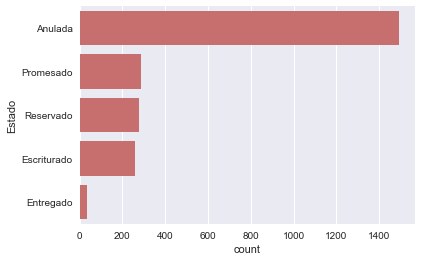

In [84]:
print('Valores nulos: ',neg_all['Estado'].isnull().sum())
ver_atributo_categorico(neg_all,'Estado',log=True)

In [41]:
#rows
df = cot_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))

Filas:  16592
Columnas:  41
Primer Registro:  2013-08-19 16:58:26
Ultimo Registro:  2018-05-22 13:42:53
Ruts Unicos:  6184


## 3.1.Explore Data

In [85]:
print("Cot rut promedio: ",get_col_group_description(neg_all,'RUT')['mean'])
print("Cot rut desviacion: ",get_col_group_description(neg_all,'RUT')['std'])
print("Cot por rut maximo: ",get_col_group_description(neg_all,'RUT')['max'])

NameError: name 'get_col_group_description' is not defined

In [59]:
#rows
df = neg_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))

Filas:  2347
Columnas:  49
Primer Registro:  2013-08-19 18:35:56.620000
Ultimo Registro:  2018-05-21 17:12:31.210000
Ruts Unicos:  1103


### 3.2.Data Exploration: Negocios

In [60]:
print("Neg rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Neg rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Neg por rut maximo: ",get_col_group_description(df,'RUT')['max'])
print("Neg estado anulados: ",len(df[df['Estado'] == 'Anulada'])/neg_all.shape[0])
print("Neg estado promesa: ",len(df[df['Estado'] == 'Promesado'])/neg_all.shape[0])
print("Neg estado reservado: ",len(df[df['Estado'] == 'Reservado'])/neg_all.shape[0])
print("Neg estado comercial desistimiento: ",len(df[df['Estado Comercial'] == 'Desistimiento'])/neg_all.shape[0])
print("Neg estado comercial normal: ",len(df[df['Estado Comercial'] == 'Normal'])/neg_all.shape[0])

Neg rut promedio:  2.127833182230281
Neg rut desviacion:  1.7149326870075374
Neg por rut maximo:  17
Neg estado anulados:  0.6352790796761824
Neg estado promesa:  0.12228376651043886
Neg estado reservado:  0.11844908393694077
Neg estado comercial desistimiento:  0.12270984235193864
Neg estado comercial normal:  0.8363868768640818


In [61]:
#columns droped 'Fecha Promesa', 'Telefono', 'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion', 
# 'Resciliacion por Modificacion', 'Motivo Desis/Resc', 'Description Desis/Resc'

#columnas no importantes para el sgte paso
unimportant_columns = ['Apellido 1','Apellido 2','Celular','Ejecutivo Comercial','Region','Provincia','Jefe Comercial','ID']
to_select_cols = df.count().sort_values(ascending=True).index.tolist()
to_select_cols = to_select_cols[8:]
to_select_cols = [item for item in to_select_cols if item not in unimportant_columns]
# to_select_cols

### 3.3.Exploracion de los ruts 

In [62]:
## Clientes en Negocios que no estan en Cotizaciones

cot_rut = cot_all['RUT'].unique().tolist()
neg_rut = neg_all['RUT'].unique().tolist()

not_in = [item for item in neg_rut if item not in cot_rut]
print("Clientes en neg que no esta en cot: ",not_in)

## Clientes en Cotizaciones que no estan en Negocios
not_in = [item for item in cot_rut if item not in neg_rut]
print("Clientes en cot que no estan en neg ",len(not_in))

# verificacion si los numeros encajan
print("cantidad de ruts unicos en cot: ",len(cot_rut))
print("cantidad de ruts unicos en neg: ",len(neg_rut))
print("total de ruts unicos en cot: neg_ruts_unicos + cot_not_in_neg = ",len(not_in) +len(neg_rut))

Clientes en neg que no esta en cot:  ['15671306-6']
Clientes en cot que no estan en neg  5082
cantidad de ruts unicos en cot:  6184
cantidad de ruts unicos en neg:  1103
total de ruts unicos en cot: neg_ruts_unicos + cot_not_in_neg =  6185


### 3.4.Exploracion de ID y ID COTIZACION 

In [63]:
# hay 7 id_negocio que tienen mas de un id_cotizacion
print("Filas :",neg_all['ID Cotizacion'].shape[0])
print("ID Cot unicos ",len(neg_all['ID Cotizacion'].unique()))

Filas : 2347
ID Cot unicos  2340


In [64]:
# que filas en negocios correspondern a los 7 ruts que tienen mas de 1 negocio
neg_id_cot_count = neg_all.groupby('ID Cotizacion').count().sort_values(by='ID',ascending=False)
neg_multiples_id = neg_id_cot_count[neg_id_cot_count['ID'] >= 2]

neg_id_rep = neg_multiples_id['ID'].index.tolist()

# view = neg_all.loc[neg_all['ID Cotizacion']==multiple_rows[1]]
view = neg_all.loc[neg_all['ID Cotizacion'].isin(neg_id_rep)]
view.loc[:,to_select_cols]
# df.loc[df['column_name'].isin(some_values)]

,Telefono,Fecha Promesa,Cargo,Empleador,Situacion Laboral,Fecha Nacimiento,Nacionalidad,Profesión,Direccion,N° Grupo Familiar,...,Tipo de Medio,Proyecto,Etapa,Total Productos,Estado,Correo Electronico,Comuna,Estado Comercial,RUT,Nombre
85,NaN,NaT,NaN,NaN,Independiente,1967-01-20,Chilena,Profesor,Camino Al Venado 585,Sin Información,...,Recontacto,Altos del Valle,ADV - Etapa 1,6040.0,Anulada,lulapolidori@gmail.com / galcazar@molicop.cl,San Pedro de la Paz,Normal,9879501-4,Maria de la Luz
88,NaN,2018-02-22,NaN,NaN,Independiente,1967-01-20,Chilena,Profesor,Camino Al Venado 585,Sin Información,...,Recontacto,Altos del Valle,ADV - Etapa 1,6040.0,Promesado,lulapolidori@gmail.com / galcazar@molicop.cl,San Pedro de la Paz,Normal,9879501-4,Maria de la Luz
4,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,Avenida inglesa 220 9F Pedro de Valdivia,2,...,Tercero,Edificio Junge,Quinta Junge - Torre B,8934.0,Anulada,arturospoerer@vtr.net,Concepción,Normal,4028907-0,Gustavo Arturo
5,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,Avenida inglesa 220 9F Pedro de Valdivia,2,...,Tercero,Edificio Junge,Quinta Junge - Torre B,8934.0,Anulada,arturospoerer@vtr.net,Concepción,Normal,4028907-0,Gustavo Arturo
6,NaN,2016-02-12,NaN,NaN,NaN,NaT,NaN,NaN,Avenida inglesa 220 9F Pedro de Valdivia,2,...,Tercero,Edificio Junge,Quinta Junge - Torre B,8934.0,Escriturado,arturospoerer@vtr.net,Concepción,Normal,4028907-0,Gustavo Arturo
13,982297510,NaT,NaN,NaN,NaN,NaT,NaN,NaN,Vilumanque,NaN,...,Cliente Aitue de otro proyecto,Edificio Junge,Quinta Junge - Torre B,5447.0,Anulada,subgerenteassuan.cl,Concepción,Normal,16766381-8,Cristian Jesus
14,982297510,2016-08-31,NaN,NaN,NaN,NaT,NaN,NaN,Vilumanque,NaN,...,Cliente Aitue de otro proyecto,Edificio Junge,Quinta Junge - Torre B,5447.0,Promesado,subgerenteassuan.cl,Concepción,Resciliacion,16766381-8,Cristian Jesus
125,78442661,NaT,Dueño,NaN,NaN,1985-10-04,NaN,NaN,av. Los Presidentes 1533 Depto casa 5,Sin Información,...,Paseo,San Andres Del Valle,SADV - ET02 Condominio Choapa,3835.0,Anulada,claudiogajardo_s@hotmail.com,Concepción,Normal,16138640-5,Claudio Alberto
135,NaN,2014-04-30,Ejecutivo,Banco Bice,Dependiente,1979-08-19,Chilena,NaN,Ramón Carrasco 239 Depto 264,3,...,Recontacto,San Andres Del Valle,SADV - ET01 Condominio Azapa,3532.0,Anulada,mbarra@bice.cl,Concepción,Normal,13628528-9,Mario Marcel
142,NaN,2014-04-30,Ejecutivo,Banco Bice,Dependiente,1979-08-19,Chilena,NaN,Ramón Carrasco 239 Depto 264,3,...,Recontacto,San Andres Del Valle,SADV - ET01 Condominio Azapa,3532.0,Promesado,mbarra@bice.cl,Concepción,Resciliacion,13628528-9,Mario Marcel
